# Test gnu-plot

In [2]:
import snap

G = snap.GenPrefAttach(100000, 3)
snap.PlotInDegDistr(G, "pref-attach", "PrefAttach(100000, 3) in Degree")

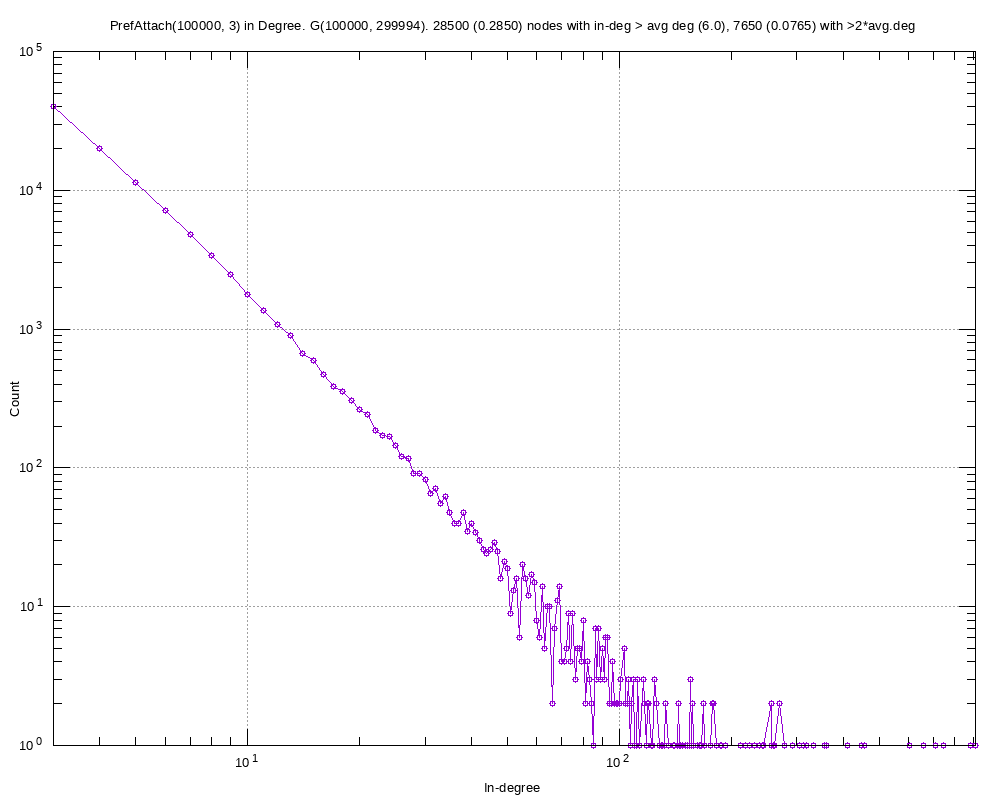

In [5]:
from IPython.display import Image
Image(filename='inDeg.pref-attach.png', width=400) 

# Test Graphviz

In [6]:
G = snap.GenGrid(snap.PUNGraph, 5, 3)
snap.DrawGViz(G, snap.gvlDot, "grid5x3.png", "Grid 5x3")

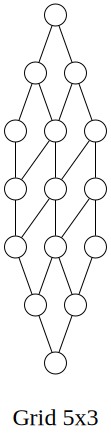

In [7]:
from graphviz import Source
Source.from_file('grid5x3.dot')

## Example Code from https://snap.stanford.edu/snappy/file/tutorial.py

In [9]:
import snap

print("----- vector ----- ")

v = snap.TIntV()

v.Add(1)
v.Add(2)
v.Add(3)
v.Add(4)
v.Add(5)

print(v.Len())
print(v[2])

v.SetVal(2, 2*v[2])
print(v[2])

for item in v:
    print(item)

for i in range(0, v.Len()):
    print(i, v[i])

print("----- hash table ----- ")

h = snap.TIntStrH()

h[5] = "five"
h[3] = "three"
h[9] = "nine"
h[6] = "six"
h[1] = "one"

print(h.Len())

print("h[3] =", h[3])

h[3] = "four"
print("h[3] =", h[3])

for key in h:
    print(key, h[key])

print("----- pair ----- ")

p = snap.TIntStrPr(1, "one");

print(p.GetVal1())
print(p.GetVal2())

print("----- graphs ----- ")

G1 = snap.TUNGraph.New()
G2 = snap.TNGraph.New()
N1 = snap.TNEANet.New()

G1.AddNode(1)
G1.AddNode(5)
G1.AddNode(32)

G1.AddEdge(1,5)
G1.AddEdge(5,1)
G1.AddEdge(5,32)

# create a directed random graph on 100 nodes and 1k edges
G2 = snap.GenRndGnm(snap.PNGraph, 100, 1000)
print("G2: Nodes %d, Edges %d" % (G2.GetNodes(), G2.GetEdges()))

# traverse the nodes
for NI in G2.Nodes():
    print("node id %d with out-degree %d and in-degree %d" % (
        NI.GetId(), NI.GetOutDeg(), NI.GetInDeg()))
# traverse the edges
for EI in G2.Edges():
    print("edge (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

# traverse the edges by nodes
for NI in G2.Nodes():
    for Id in NI.GetOutEdges():
        print("edge (%d %d)" % (NI.GetId(), Id))

# save and load binary
FOut = snap.TFOut("test.graph")
G2.Save(FOut)
FOut.Flush()
FIn = snap.TFIn("test.graph")
G4 = snap.TNGraph.Load(FIn)
print("G4: Nodes %d, Edges %d" % (G4.GetNodes(), G4.GetEdges()))

# save and load from a text file
snap.SaveEdgeList(G4, "test.txt", "Save as tab-separated list of edges")
G5 = snap.LoadEdgeList(snap.PNGraph, "test.txt", 0, 1)
print("G5: Nodes %d, Edges %d" % (G5.GetNodes(), G5.GetEdges()))

# create a directed random graph on 10k nodes and 5k edges
G6 = snap.GenRndGnm(snap.PNGraph, 10000, 5000)
print("G6: Nodes %d, Edges %d" % (G6.GetNodes(), G6.GetEdges()))
# convert to undirected graph
G7 = snap.ConvertGraph(snap.PUNGraph, G6)
print("G7: Nodes %d, Edges %d" % (G7.GetNodes(), G7.GetEdges()))
# get largest weakly connected component
WccG = snap.GetMxWcc(G6)

# generate a network using Forest Fire model
G8 = snap.GenForestFire(1000, 0.35, 0.35)
print("G8: Nodes %d, Edges %d" % (G8.GetNodes(), G8.GetEdges()))

# get a subgraph induced on nodes {0,1,2,3,4}
SubG = snap.GetSubGraph(G8, snap.TIntV.GetV(0,1,2,3,4))

# get 3-core of G8
Core3 = snap.GetKCore(G8, 3)
print("Core3: Nodes %d, Edges %d" % (Core3.GetNodes(), Core3.GetEdges()))

# delete nodes of out degree 3 and in degree 2
snap.DelDegKNodes(G8, 3, 2)

# create a directed random graph on 10k nodes and 1k edges
G9 = snap.GenRndGnm(snap.PNGraph, 10000, 1000)
print("G9: Nodes %d, Edges %d" % (G9.GetNodes(), G9.GetEdges()))

# define a vector of pairs of integers (size, count) and
# get a distribution of connected components (component size, count)
CntV = snap.TIntPrV()
snap.GetWccSzCnt(G9, CntV)
for p in CntV:
    print("size %d: count %d" % (p.GetVal1(), p.GetVal2()))

# get degree distribution pairs (out-degree, count):
snap.GetOutDegCnt(G9, CntV)
for p in CntV:
    print("degree %d: count %d" % (p.GetVal1(), p.GetVal2()))

# generate a Preferential Attachment graph on 100 nodes and out-degree of 3
G10 = snap.GenPrefAttach(100, 3)
print("G10: Nodes %d, Edges %d" % (G10.GetNodes(), G10.GetEdges()))

# define a vector of floats and get first eigenvector of graph adjacency matrix
EigV = snap.TFltV()
snap.GetEigVec(G10, EigV)
nr = 0
for f in EigV:
    nr += 1
    print("%d: %.6f" % (nr, f))

# get an approximation of graph diameter
diam = snap.GetBfsFullDiam(G10, 10)
print("diam", diam)

# count the number of triads:
triads = snap.GetTriads(G10)
print("triads", triads)

# get the clustering coefficient
cf = snap.GetClustCf(G10)
print("cf", cf)


----- vector ----- 
5
3
6
1
2
6
4
5
0 1
1 2
2 6
3 4
4 5
----- hash table ----- 
5
h[3] = three
h[3] = four
5 five
3 four
9 nine
6 six
1 one
----- pair ----- 
1
one
----- graphs ----- 
G2: Nodes 100, Edges 1000
node id 0 with out-degree 11 and in-degree 14
node id 1 with out-degree 9 and in-degree 10
node id 2 with out-degree 10 and in-degree 8
node id 3 with out-degree 8 and in-degree 8
node id 4 with out-degree 9 and in-degree 9
node id 5 with out-degree 7 and in-degree 5
node id 6 with out-degree 6 and in-degree 12
node id 7 with out-degree 12 and in-degree 11
node id 8 with out-degree 11 and in-degree 14
node id 9 with out-degree 9 and in-degree 16
node id 10 with out-degree 15 and in-degree 10
node id 11 with out-degree 10 and in-degree 11
node id 12 with out-degree 8 and in-degree 6
node id 13 with out-degree 14 and in-degree 11
node id 14 with out-degree 8 and in-degree 8
node id 15 with out-degree 11 and in-degree 10
node id 16 with out-degree 11 and in-degree 9
node id 17 with 